In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import datetime as dt
%pylab inline
from sklearn import linear_model

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('athlete_events.csv', dtype=unicode)
df['Age'] =df['Age'].astype(float)
df['Height'] = df['Height'].astype(float)
df['Weight'] =df['Weight'].astype(float)
df['Year'] = df['Year'].astype(int)
df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
sport = df[['Name','NOC','Sport','Games']].drop_duplicates()
sport[['Name','Sport']].drop_duplicates()['Sport'].value_counts()


Athletics                    22053
Swimming                      8761
Rowing                        7684
Football                      6161
Cycling                       5819
Boxing                        5254
Wrestling                     4987
Shooting                      4879
Sailing                       4480
Gymnastics                    4132
Fencing                       4118
Ice Hockey                    3882
Hockey                        3813
Basketball                    3412
Canoeing                      3204
Weightlifting                 2880
Alpine Skiing                 2734
Judo                          2721
Handball                      2699
Water Polo                    2599
Volleyball                    2502
Cross Country Skiing          2400
Equestrianism                 2345
Art Competitions              1814
Bobsleigh                     1694
Speed Skating                 1582
Figure Skating                1572
Diving                        1466
Tennis              

In [4]:
mlr = df
# mlr.Medal.map(dict(Gold=1,Silver=1,Bronze=1))
def medal (column):
    if column =='Gold':
        return 1
    elif column =='Silver':
        return 1
    elif column =='Bronze':
        return 1
    else:
        return 0

mlr['Medal Winner']=mlr['Medal'].apply(medal)
mlr

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal Winner
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,0
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,0
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,0
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,0


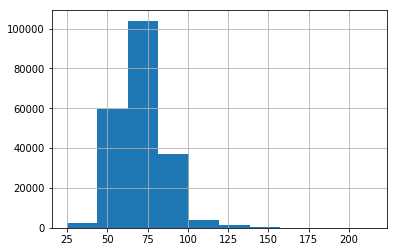

In [5]:
df['Weight'].dropna().hist()

In [6]:
athlete=df[['Name','Age','Height','Weight','Games','Event']].drop_duplicates().dropna()

display(athlete['Age'].mean())
display(athlete['Height'].mean())
display(athlete['Weight'].mean())

25.054736576587064

175.37206707704547

70.68836435428399

In [7]:
athlete_s=df[['Name','Age','Height','Season','Weight','Games','Event']].drop_duplicates().dropna()
mask1=athlete_s['Season'] == 'Summer'
athlete_summer=athlete_s[mask1]
display(athlete_summer['Age'].mean())
display(athlete_summer['Height'].mean())
display(athlete_summer['Weight'].mean())

25.04367936073717

175.54835265039713

70.67249178124925

In [8]:
mask2=athlete_s['Season'] == 'Winter'
athlete_winter=athlete_s[mask2]
display(athlete_winter['Age'].mean())
display(athlete_winter['Height'].mean())
display(athlete_winter['Weight'].mean())

25.101447071643985

174.62736004460325

70.75541701512962

In [9]:
medal_winner=df[['Name','Age','Height','Weight','Games','Event','Medal']].drop_duplicates().dropna()
medal_winner.groupby(['Medal'])['Age','Height','Weight'].mean()

,Age,Height,Weight
Medal,,,
Bronze,25.493890,177.353666,73.491821
Gold,25.330678,177.997246,74.134110
Silver,25.463612,177.573586,73.630600


In [10]:
country_hac=df[['Sex','Age','NOC','Height','Weight','Games','Event','Medal']].drop_duplicates().dropna()
country_hac=country_hac.groupby(['Medal','Sex'])['Age','Height','Weight'].mean()
country_hac=country_hac.reset_index()

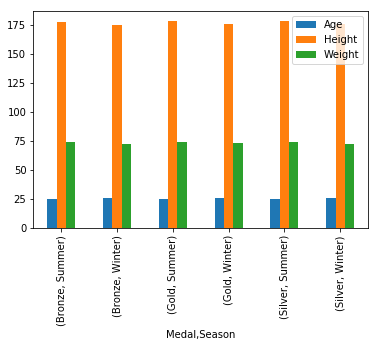

In [11]:
season_hac=df[['Sex','Age','NOC','Height','Weight','Games','Season','Event','Medal']].drop_duplicates().dropna()
season_hac=season_hac.groupby(['Medal','Season'])['Age','Height','Weight'].mean().plot(kind='bar')
#season_hac

In [12]:
age_height = df
age_height.dropna(subset = ['Age','Height','Weight'],inplace=True)
age_height['Age'] =age_height['Age'].astype(float)
age_height['Height'] = age_height['Height'].astype(float)
age_height['Weight'] =age_height['Weight'].astype(float)
age_height['Year'] = age_height['Year'].astype(int)
age_height.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal Winner
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,0


In [13]:
f['Weight'].dropna().hist()

TypeError: 'builtin_function_or_method' object has no attribute '__getitem__'

In [ ]:
def periodSplit(y):
    if (y < 1926):
        period = '1early'
    elif (y < 1956):
        period = '2mid_early'
    elif ( y < 1986):
        period = '3early_modern'
    else:
        period = '4modern'
        
    return period

age_height['Period'] = age_height['Year'].map(periodSplit)

age_height.head()

In [ ]:
country_period =age_height.groupby(['NOC','Period'])['Age','Height','Weight'].mean()

country_period.head()

In [ ]:
country_stats = country_period.unstack()
country_stats=country_stats.dropna()
country_stats=country_stats.reset_index()
country_stats.head()

In [ ]:


df['Year']=df['Year'].astype(int)

In [ ]:
teams = df['Team']  # Select one column from our DataFrame; this is a Series
mask = ((df['Year'] >= 1896) & (df['Year'] <= 1926))
mask2 = ((df['Year'] >= 1927) & (df['Year'] <= 1957))
mask3 = ((df['Year'] >= 1958) & (df['Year'] <= 1988))
mask4 = ((df['Year'] >= 1989) & (df['Year'] <= 2016))
early=df[mask]
early1 = df[mask]
early2 = df[mask]
mid_early=df[mask2]
mid_early1 =df[mask2]
mid_early2 = df[mask2]
early_modern = df[mask3]
early_modern1 = df[mask3]
early_modern2 = df[mask3]
modern = df[mask4]
modern1 = df[mask4]
modern2 = df[mask4]

early


In [ ]:
count1 = early['NOC'].value_counts()
df1 = pd.DataFrame(columns=['Medals(1896-1926)'])
df1['Medals(1896-1926)']= early['NOC'].value_counts()
df1.reset_index(level=0, inplace=True)
df1.columns=['NOC','Medals(1896-1926)']
df1.head()


In [ ]:
count2 = mid_early['NOC'].value_counts()
df2 = pd.DataFrame(columns=['Medals(1927-1957)'])
df2['Medals(1927-1957)']= mid_early['NOC'].value_counts()
df2.reset_index(level=0, inplace=True)
df2.columns=['NOC','Medals(1927-1957)']
df2.head()

In [ ]:
count3 = early_modern['NOC'].value_counts()
df3 = pd.DataFrame(columns=['Medals(1958-1988)'])
df3['Medals(1958-1988)']= early_modern['NOC'].value_counts()
df3.reset_index(level=0, inplace=True)
df3.columns=['NOC','Medals(1958-1988)']
df3.head()

In [ ]:
count4 = modern['NOC'].value_counts()
df4 = pd.DataFrame(columns=['Medals(1989-2016)'])
df4['Medals(1989-2016)']= modern['NOC'].value_counts()
df4.reset_index(level=0, inplace=True)
df4.columns=['NOC','Medals(1989-2016)']
df4.head()

In [ ]:
olympic_periods = df1.merge(df2,
                                   left_on='NOC',
                                   right_on='NOC',
                                  )
olympic_periods = olympic_periods.merge(df3,
                                   left_on='NOC',
                                   right_on='NOC',
                                   )
olympic_periods = olympic_periods.merge(df4,
                                   left_on='NOC',
                                   right_on='NOC',
                                   )
olympic_periods['Medals(1896-1926)']=(olympic_periods['Medals(1896-1926)']/(olympic_periods['Medals(1896-1926)'].sum()))
olympic_periods['Medals(1927-1957)']=(olympic_periods['Medals(1927-1957)']/(olympic_periods['Medals(1927-1957)'].sum()))
olympic_periods['Medals(1958-1988)']=(olympic_periods['Medals(1958-1988)']/(olympic_periods['Medals(1958-1988)'].sum()))
olympic_periods['Medals(1989-2016)']=(olympic_periods['Medals(1989-2016)']/(olympic_periods['Medals(1989-2016)'].sum()))
olympic_periods

In [ ]:
mask = olympic_periods['Medals(1927-1957)']/olympic_periods['Medals(1896-1926)'] >1.49
early=olympic_periods[['NOC','Medals(1896-1926)','Medals(1927-1957)']]
mask1 = early['Medals(1927-1957)']>=.01
early_risers=early[mask]
early_risers = early_risers[mask1]
early_risers['Percent Increase'] = (early_risers['Medals(1927-1957)']/early_risers['Medals(1896-1926)']) *100
early_risers.sort_values(by=['Percent Increase'],ascending=False)


In [ ]:
mask2 = olympic_periods['Medals(1927-1957)']/olympic_periods['Medals(1896-1926)'] <.51
early1=olympic_periods[['NOC','Medals(1896-1926)','Medals(1927-1957)']]
mask3 = early1['Medals(1896-1926)'] >=.01
early_fallers=early1[mask2]
early_fallers = early_fallers[mask3]
early_fallers['Percent Decrease'] = (early_fallers['Medals(1896-1926)']/early_fallers['Medals(1927-1957)']) *100
early_fallers.sort_values(by=['Percent Decrease'],ascending=False)

In [ ]:
mask4 = olympic_periods['Medals(1958-1988)']/olympic_periods['Medals(1927-1957)'] >1.49
mid=olympic_periods[['NOC','Medals(1927-1957)','Medals(1958-1988)']]
mask5 = mid['Medals(1958-1988)']>=.01
mid_risers=mid[mask4]
mid_risers = mid_risers[mask5]
mid_risers['Percent Increase'] = (mid_risers['Medals(1958-1988)']/mid_risers['Medals(1927-1957)']) *100
mid_risers.sort_values(by=['Percent Increase'],ascending=False)

In [ ]:
mask6 = olympic_periods['Medals(1958-1988)']/olympic_periods['Medals(1927-1957)'] <.51
mid1=olympic_periods[['NOC','Medals(1927-1957)','Medals(1958-1988)']]
mask7 = mid1['Medals(1927-1957)']>=.01
mid_fallers=mid1[mask6]
mid_fallers = mid_fallers[mask7]
mid_fallers['Percent Decrease'] = (mid_fallers['Medals(1927-1957)']/mid_fallers['Medals(1958-1988)']) *100
mid_fallers.sort_values(by=['Percent Decrease'],ascending=False)

In [ ]:
mask8 = olympic_periods['Medals(1989-2016)']/olympic_periods['Medals(1958-1988)'] >1.49
modern=olympic_periods[['NOC','Medals(1958-1988)','Medals(1989-2016)']]
mask9 = modern['Medals(1989-2016)']>=.01
modern_risers=modern[mask8]
modern_risers = modern_risers[mask9]
modern_risers['Percent Increase'] = (modern_risers['Medals(1989-2016)']/modern_risers['Medals(1958-1988)']) *100
modern_risers.sort_values(by=['Percent Increase'],ascending=False)

In [ ]:
mask10 = olympic_periods['Medals(1989-2016)']/olympic_periods['Medals(1958-1988)'] <.51
modern1=olympic_periods[['NOC','Medals(1958-1988)','Medals(1989-2016)']]
mask11 = modern1['Medals(1958-1988)']>=.01
modern_fallers=modern1[mask10]
modern_fallers = modern_fallers[mask11]
modern_fallers['Percent Decrease'] = (modern_fallers['Medals(1958-1988)']/modern_fallers['Medals(1989-2016)']) *100
modern_fallers.sort_values(by=['Percent Decrease'],ascending=False)

In [ ]:
mask12 = olympic_periods['Medals(1989-2016)']/olympic_periods['Medals(1896-1926)'] >1.49
allTime=olympic_periods[['NOC','Medals(1896-1926)','Medals(1989-2016)']]
mask13 = allTime['Medals(1989-2016)']>=.01
allTime_risers=allTime[mask12]
allTime_risers = allTime_risers[mask13]
allTime_risers['Percent Increase'] = (allTime_risers['Medals(1989-2016)']/allTime_risers['Medals(1896-1926)']) *100
allTime_risers.sort_values(by=['Percent Increase'],ascending=False)

In [ ]:
mask14 = olympic_periods['Medals(1989-2016)']/olympic_periods['Medals(1896-1926)'] <.51
allTime1=olympic_periods[['NOC','Medals(1896-1926)','Medals(1989-2016)']]
mask15 = allTime1['Medals(1896-1926)']>=.01
allTime_fallers=allTime1[mask14]
allTime_fallers = allTime_fallers[mask15]
allTime_fallers['Percent Decrease'] = (allTime_fallers['Medals(1896-1926)']/allTime_fallers['Medals(1989-2016)']) *100
allTime_fallers.sort_values(by=['Percent Decrease'],ascending=False)

In [ ]:
early_cnt = early2[['NOC','Name','Games']].drop_duplicates()['NOC'].value_counts()
mid_cnt = mid_early2[['NOC','Name','Games']].drop_duplicates()['NOC'].value_counts()
early_modern_cnt = early_modern2[['NOC','Name','Games']].drop_duplicates()['NOC'].value_counts()
modern_cnt = modern2[['NOC','Name','Games']].drop_duplicates()['NOC'].value_counts()

In [ ]:
early_cmp= pd.DataFrame(early_cnt)
early_cmp['Mid Count']= mid_cnt
early_cmp['change'] = ((early_cmp['Mid Count']/early_cmp['Mid Count'].sum())-(early_cmp['NOC']/early_cmp['NOC'].sum()))*100
early_cmp.reset_index(level=0, inplace=True)
early_cmp.columns=['NOC','Early Count','Mid Count','Athlete # Percent Change']
mask16 = early_cmp['NOC'].isin(early_fallers['NOC'])
mask17 = early_cmp['NOC'].isin(early_risers['NOC'])
early_cmp[mask16]

In [ ]:
mid_cmp= pd.DataFrame(mid_cnt)
mid_cmp['Mid Count']= early_modern_cnt
mid_cmp['change'] = ((mid_cmp['Mid Count']/mid_cmp['Mid Count'].sum())-(mid_cmp['NOC']/mid_cmp['NOC'].sum()))*100
mid_cmp.reset_index(level=0, inplace=True)
mid_cmp.columns=['NOC','Mid Count','Early Modern Count','Athlete # Percent Change']
mask18 = mid_cmp['NOC'].isin(mid_fallers['NOC'])
mask19 = mid_cmp['NOC'].isin(mid_risers['NOC'])
mid_cmp[mask19]

In [ ]:
modern_cmp= pd.DataFrame(early_modern_cnt)
modern_cmp['Mid Count']= modern_cnt
modern_cmp['change'] = ((modern_cmp['Mid Count']/modern_cmp['Mid Count'].sum())-(modern_cmp['NOC']/modern_cmp['NOC'].sum()))*100
modern_cmp.reset_index(level=0, inplace=True)
modern_cmp.columns=['NOC','Early Modern Count','Modern Count','Athlete # Percent Change']
mask20 = modern_cmp['NOC'].isin(modern_fallers['NOC'])
mask21 = modern_cmp['NOC'].isin(modern_risers['NOC'])
modern_cmp[mask21]

In [ ]:
all_cmp= pd.DataFrame(modern_cnt)
all_cmp['Early Count']= early_cnt
all_cmp['change'] = ((all_cmp['Early Count']/all_cmp['Early Count'].sum())-(all_cmp['NOC']/all_cmp['NOC'].sum()))*100
all_cmp.reset_index(level=0, inplace=True)
all_cmp.columns=['NOC','Modern Count','Early Count','Athlete # Percent Change']
mask122 = all_cmp['NOC'].isin(allTime_fallers['NOC'])
mask23 = all_cmp['NOC'].isin(allTime_risers['NOC'])
all_cmp[mask23]

In [ ]:
early4 = pd.DataFrame(index=df['NOC'].drop_duplicates(),columns=['rank'])
early4.columns=['n']

mid4 = pd.DataFrame(index=df['NOC'].drop_duplicates(),columns=['rank'])
mid4.columns=['n']

modern4 = pd.DataFrame(index=df['NOC'].drop_duplicates(),columns=['rank'])
modern4.columns=['n']

allTime4 = pd.DataFrame(index=df['NOC'].drop_duplicates(),columns=['rank'])
allTime4.columns=['n']

In [ ]:


country_stats['Age']['1early'] = (country_stats['Age']['1early'])/(country_stats['Age']['1early'].mean())
country_stats['Age']['2mid_early'] = (country_stats['Age']['2mid_early'])/(country_stats['Age']['2mid_early'].mean())
country_stats['Age']['3early_modern'] = (country_stats['Age']['3early_modern'])/(country_stats['Age']['3early_modern'].mean())
country_stats['Age']['4modern'] = (country_stats['Age']['4modern'])/(country_stats['Age']['4modern'].mean())

country_stats['Height']['1early'] = (country_stats['Height']['1early'])/(country_stats['Height']['1early'].mean())
country_stats['Height']['2mid_early'] = (country_stats['Height']['2mid_early'])/(country_stats['Height']['2mid_early'].mean())
country_stats['Height']['3early_modern'] = (country_stats['Height']['3early_modern'])/(country_stats['Height']['3early_modern'].mean())
country_stats['Height']['4modern'] = (country_stats['Height']['4modern'])/(country_stats['Height']['4modern'].mean())

country_stats['Weight']['1early'] = (country_stats['Weight']['1early'])/(country_stats['Weight']['1early'].mean())
country_stats['Weight']['2mid_early'] = (country_stats['Weight']['2mid_early'])/(country_stats['Weight']['2mid_early'].mean())
country_stats['Weight']['3early_modern'] = (country_stats['Weight']['3early_modern'])/(country_stats['Weight']['3early_modern'].mean())
country_stats['Weight']['4modern'] = (country_stats['Weight']['4modern'])/(country_stats['Weight']['4modern'].mean())

country_stats

In [ ]:
early4=early4.reset_index()
mid4=mid4.reset_index()
modern4=modern4.reset_index()
allTime4=allTime4.reset_index()
early4['Early_Age_faller']=country_stats['Age']['1early'] - country_stats['Age']['2mid_early']
early4['Early_Age_riser']=country_stats['Age']['2mid_early'] - country_stats['Age']['1early']

early4['Early_Height_faller']=country_stats['Height']['1early'] - country_stats['Height']['2mid_early']
early4['Early_Height_riser']=country_stats['Height']['2mid_early'] - country_stats['Height']['1early']

early4['Early_Weight_faller']=country_stats['Weight']['1early'] - country_stats['Weight']['2mid_early']
early4['Early_Weight_riser']=country_stats['Weight']['2mid_early'] - country_stats['Weight']['1early']

mid4['Mid_Early_Age_faller']=country_stats['Age']['2mid_early'] - country_stats['Age']['3early_modern']
mid4['Mid_Early_Age_riser']=country_stats['Age']['3early_modern'] - country_stats['Age']['2mid_early']

mid4['Mid_Early_Height_faller']=country_stats['Height']['2mid_early'] - country_stats['Height']['3early_modern']
mid4['Mid_Early_Height_riser']=country_stats['Height']['3early_modern'] - country_stats['Height']['2mid_early']

mid4['Mid_Early_Weight_faller']=country_stats['Weight']['2mid_early'] - country_stats['Weight']['3early_modern']
mid4['Mid_Early_Weight_riser']=country_stats['Weight']['3early_modern'] - country_stats['Weight']['2mid_early']

modern4['Early_Modern_Age_faller']=country_stats['Age']['3early_modern'] - country_stats['Age']['4modern']
modern4['Early_Modern_Age_riser']=country_stats['Age']['4modern'] - country_stats['Age']['3early_modern']

modern4['Early_Modern_Height_faller']=country_stats['Height']['3early_modern'] - country_stats['Height']['4modern']
modern4['Early_Modern_Height_riser']=country_stats['Height']['4modern'] - country_stats['Height']['3early_modern']

modern4['Early_Modern_Weight_faller']=country_stats['Weight']['3early_modern'] - country_stats['Weight']['4modern']
modern4['Early_Modern_Weight_riser']=country_stats['Weight']['4modern'] - country_stats['Weight']['3early_modern']
allTime4['AllTime_Age_faller']=country_stats['Age']['1early'] - country_stats['Age']['4modern']
allTime4['AllTime_Age_riser']=country_stats['Age']['4modern'] - country_stats['Age']['1early']

allTime4['AllTime_Height_faller']=country_stats['Height']['1early'] - country_stats['Height']['4modern']
allTime4['AllTime_Height_riser']=country_stats['Height']['4modern'] - country_stats['Height']['1early']

allTime4['AllTime_Weight_faller']=country_stats['Weight']['1early'] - country_stats['Weight']['4modern']
allTime4['AllTime_Weight_riser']=country_stats['Weight']['4modern'] - country_stats['Weight']['1early']


In [ ]:

mask18 = early4['NOC'].isin(early_fallers['NOC'])
mask19 = early4['NOC'].isin(early_risers['NOC'])
early4[mask19]

In [ ]:
mask20 = mid4['NOC'].isin(mid_fallers['NOC'])
mask21 = mid4['NOC'].isin(mid_risers['NOC'])
mid4[mask21]

In [ ]:
mask22 = modern4['NOC'].isin(modern_fallers['NOC'])
mask23 = modern4['NOC'].isin(modern_risers['NOC'])
mid4[mask23]

In [ ]:
mask24 = allTime4['NOC'].isin(allTime_fallers['NOC'])
mask25 = allTime4['NOC'].isin(allTime_risers['NOC'])
allTime4[mask24]